# Metrics
Want to implement the following metrics and visulizations to evaluate our models:

- [x] Accuracy
- [x] Precision
- [x] Recall
- [x] F1-Score
- [x] Confusion Matrix

In [11]:
# init model
from models import DreamLR
from utils import load_data

masks, data = load_data(1)

log_model = DreamLR(masks, data)
log_model.get_label_names(counts=True)

{'building': 4,
 'chair': 1,
 'character': 4,
 'clothing': 1,
 'code': 1,
 'cognition': 2,
 'external_body_part': 1,
 'geographical_area': 1,
 'girl': 2,
 'group': 1,
 'illustration': 3,
 'implement': 2,
 'line': 3,
 'male': 2,
 'material': 1,
 'natural_object': 2,
 'performer': 1,
 'picture': 2,
 'room': 1,
 'shape': 2,
 'table': 0,
 'vertebrate': 2,
 'way': 1,
 'window': 1,
 'workplace': 1,
 'writing': 2}

In [2]:
# fit model for single classification
results, testx, testy = log_model.run("FFA", class_name="character")

running for class:character...


In [3]:
# fit model for multilabel classification
resultsm, testxm, testym = log_model.run("FFA",)

running for class:None...


In [4]:
# display single label classification results
from sklearn.metrics import classification_report

preds = results.predict(testx)
print(classification_report(testy, preds))

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84        40
         1.0       0.00      0.00      0.00         7

    accuracy                           0.72        47
   macro avg       0.41      0.42      0.42        47
weighted avg       0.71      0.72      0.71        47



In [5]:
# display multilabel classification_results
predsm = resultsm.predict(testxm)
print(classification_report(testym, predsm, target_names= log_model.get_label_names(), zero_division=0))

                    precision    recall  f1-score   support

          building       0.00      0.00      0.00         4
             chair       0.00      0.00      0.00         2
         character       0.00      0.00      0.00         7
          clothing       0.00      0.00      0.00         2
              code       0.00      0.00      0.00         2
         cognition       0.00      0.00      0.00         1
external_body_part       0.00      0.00      0.00         4
 geographical_area       0.00      0.00      0.00         4
              girl       0.00      0.00      0.00         5
             group       0.00      0.00      0.00         4
      illustration       0.00      0.00      0.00         0
         implement       0.00      0.00      0.00         1
              line       0.00      0.00      0.00         1
              male       0.61      0.42      0.50        26
          material       0.00      0.00      0.00         1
    natural_object       0.00      0.00

In [6]:
# create multilable confusion matrix
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
mcf = multilabel_confusion_matrix(testym, predsm)
mcf[0]

array([[41,  2],
       [ 4,  0]])

From the docs...
> In multilabel confusion matrix MCM, the count of true negatives is MCM[0, 0], false negatives is MCM[1, 0], true positives is MCM[1, 1] and false positives is MCM[0, 1].

eg; $\begin{matrix} - & TN & FP \\ + & FN & TP \\ & - & +\end{matrix}$ where the x-axis is the predictions and y-axis is labels


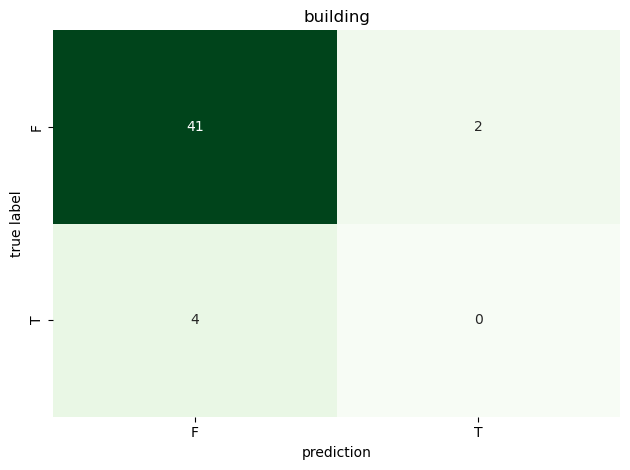

In [7]:
# plot a single confusion matrix
# based on https://stackoverflow.com/questions/62722416/plot-confusion-matrix-for-multilabel-classifcation-python
import seaborn as sb
import matplotlib.pyplot as plt
def plot_multilab_cf(mcf, label_name, ax):
	sb.heatmap(mcf, annot=True, ax = ax, cbar = False, xticklabels = ["F", "T"], yticklabels=["F", "T"], cmap="Greens")
	ax.set_title(label_name)
	ax.set_xlabel("prediction")
	ax.set_ylabel("true label")

fig, ax = plt.subplots(1)
plot_multilab_cf(mcf[0], log_model.get_label_names()[0], ax)
fig.tight_layout()

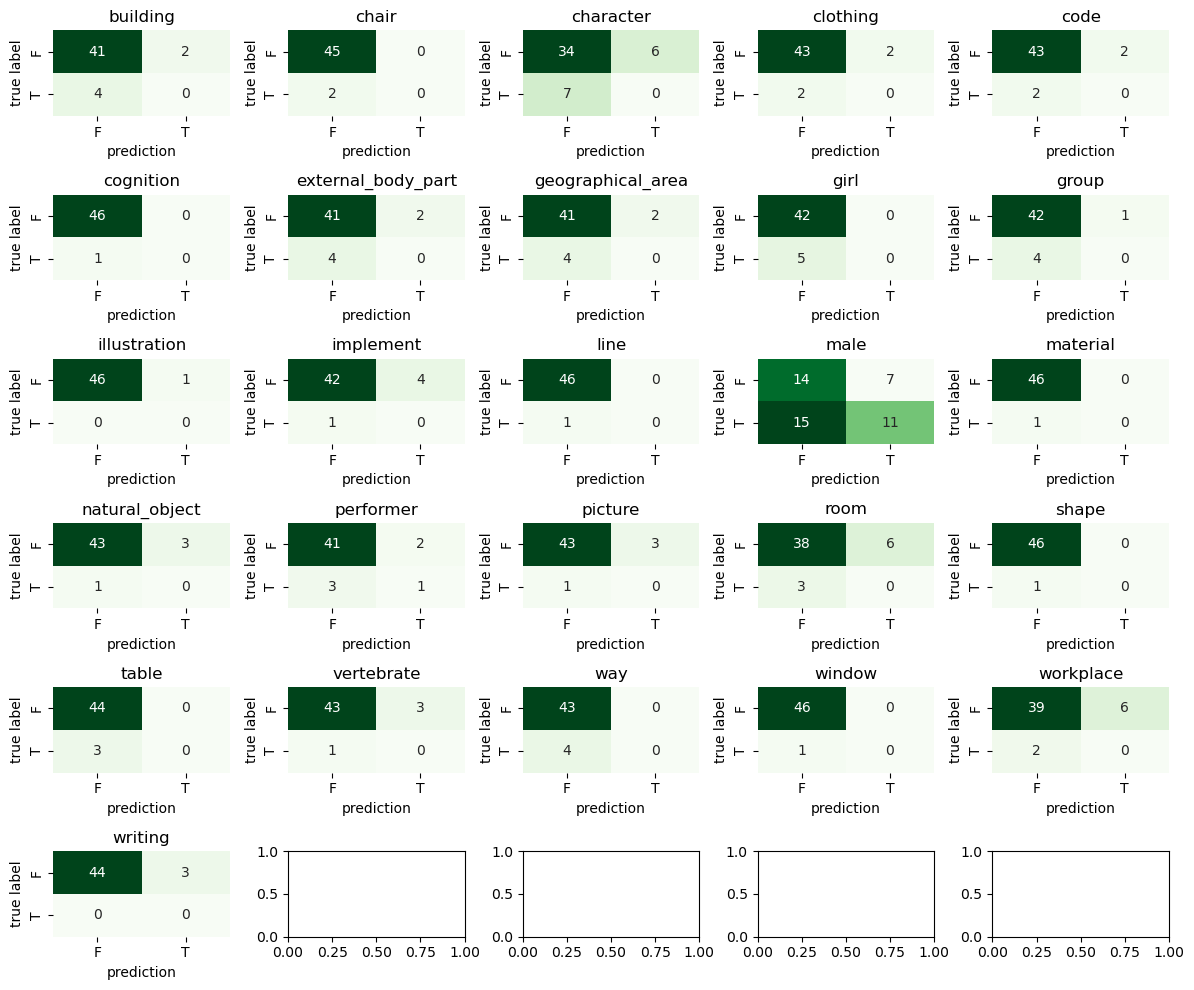

In [9]:
# plot all confusion matrices for multilabel classification
fig, ax = plt.subplots(6, 5, figsize = (12, 10))
ax = ax.flatten()
label_names = log_model.get_label_names()
for i in range(mcf.shape[0]):
	plot_multilab_cf(mcf[i], label_names[i], ax[i])
fig.tight_layout()

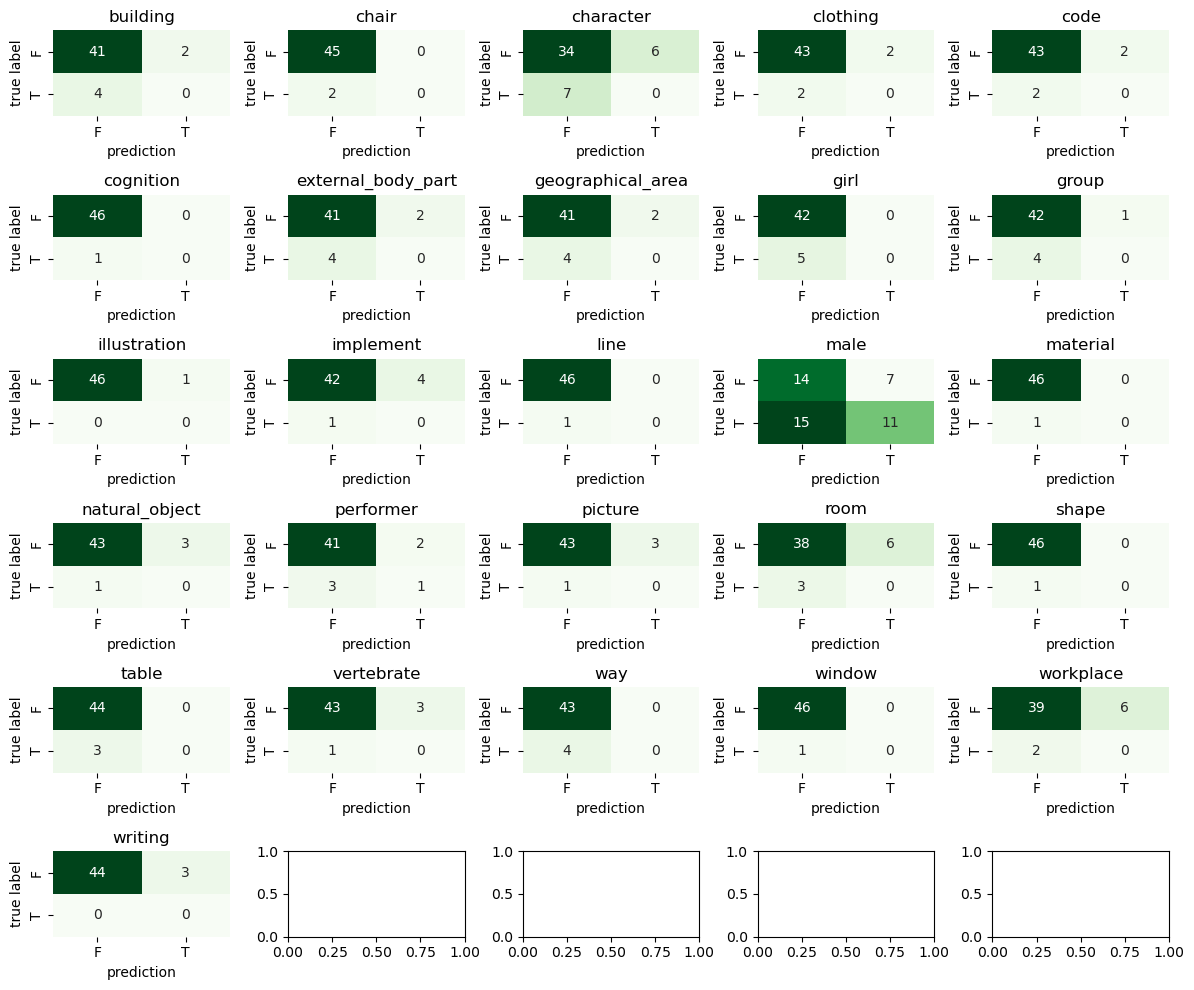

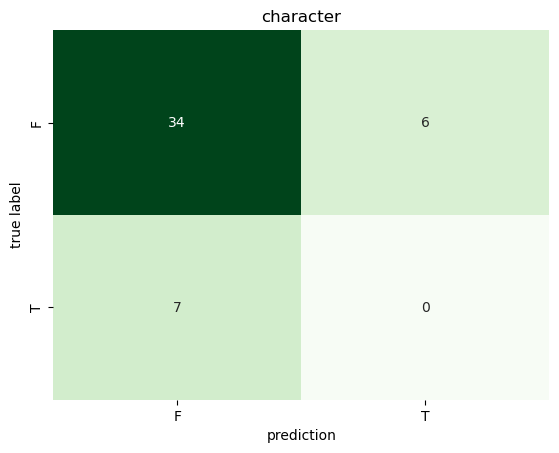

In [12]:
# test plotting functions
from plotting import plot_confusion_matrix

mlcf = plot_confusion_matrix(testym, predsm, label_names)
cf = plot_confusion_matrix(testy, preds, "character")